In [1]:
%matplotlib inline
import numpy as np
from simple_disk import simple_disk
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use('paper')

#### Nicer colormap

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
c2 = plt.cm.Reds(np.linspace(0, 1, 32))
c1 = plt.cm.Blues_r(np.linspace(0, 1, 32))
colors = np.vstack((c1, np.ones(4), c2))
BuRd = mcolors.LinearSegmentedColormap.from_list('eddymap', colors)
RdBu = mcolors.LinearSegmentedColormap.from_list('eddymap', colors[::-1])

In [3]:
# make a flat 2D disk based on HD 163296.
disk = simple_disk(inc=-47.9, PA=312.)

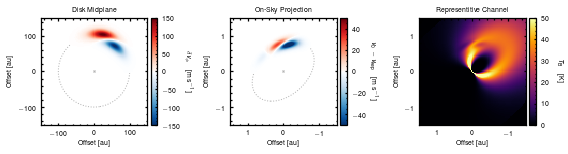

In [4]:
# doppler flip comparison.

v = 200.  # velocity of the perturbations in [m/s]
r0 = 100. # radius of flip center in [au]
t0 = 65. # polar angle of flip center in [deg]
dr = 10.   # radial width in [au]
dt = 15.   # arc length of flip in [au]

dr0 = 1.0 # radial separation of flip components as fraction of `dr`
dt0 = 1.0 # azimuthal separation of flip components as fraction of `dt`

# make the figure 

fig, axs = plt.subplots(ncols=3, figsize=(8, 3))

# in the disk plane
ax = axs[0]
ax.scatter(0, 0, marker='x', color='0.7', lw=1.0, s=4)

dv0 = disk.doppler_flip(v, r0, t0, dr, dt, sky=False)

im = ax.imshow(np.where(abs(dv0) > 0.1, dv0, np.nan), origin='lower',
               vmin=-150, vmax=150, extent=disk.extent_au, cmap=BuRd)
cax = make_axes_locatable(ax).append_axes('right', size='6%', pad=0.05)
cb = plt.colorbar(im, cax=cax)
cb.set_label(r'$\delta v_{\phi} \quad [{\rm m\,s^{-1}}]$', rotation=270, labelpad=13)
ax.contour(disk.x_au, disk.y_au, disk.r_disk, [r0], linestyles=':', linewidths=1.0, colors='0.7', zorder=-1)
ax.set_xlim(ax.get_xlim()[1], ax.get_xlim()[0])
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_major_locator(MultipleLocator(100))
ax.set_xlabel('Offset [au]')
ax.set_ylabel('Offset [au]')
ax.set_title('Disk Midplane', fontsize=7)

# projected deviation
dv0 = disk.doppler_flip(v, r0, t0, dr, dt, sky=True)

ax = axs[1]
ax.scatter(0, 0, marker='x', color='0.7', lw=1.0, s=4)
im = ax.imshow(np.where(abs(dv0) > 0.1, dv0, np.nan),
               origin='lower', vmin=-50, vmax=50, extent=disk.extent_arcsec, cmap=BuRd)
cax = make_axes_locatable(ax).append_axes('right', size='6%', pad=0.05)
cb = plt.colorbar(im, cax=cax)
cb.set_label(r'$v_0 - v_{\rm kep} \quad [{\rm m\,s^{-1}}]$', rotation=270, labelpad=13)
ax.contour(disk.x_arcsec, disk.y_arcsec, disk.r_sky, [r0],  linestyles=':', linewidths=1.0, colors='0.7', zorder=-1)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.set_xlabel('Offset [au]')
ax.set_ylabel('Offset [au]')
ax.set_title('On-Sky Projection', fontsize=7)

# channel map deviation


dV = 50.
temp = np.where(abs(disk.r_sky - r0) > 0.1, 1e10, disk.t_sky)
yidx, xidx = np.unravel_index(abs(temp - t0).argmin(), temp.shape)
yidx, xidx = np.unravel_index(abs(dv0).argmax(), temp.shape)
v_min = disk.vkep_proj[yidx, xidx] - 0.5 * dV
v_max = disk.vkep_proj[yidx, xidx] + 0.5 * dV


ax = axs[2]
#ax.scatter(0, 0, marker='x', color='0.3', lw=1.0, s=4)
im = ax.imshow(disk.get_channel(dv0, v_min=v_min, v_max=v_max), origin='lower',
               vmin=0, vmax=50, extent=disk.extent_arcsec, cmap='inferno')
cax = make_axes_locatable(ax).append_axes('right', size='6%', pad=0.05)
cb = plt.colorbar(im, cax=cax)
cb.set_label(r'$T_{\rm B} \quad [{\rm K}]$', rotation=270, labelpad=13)

ax.contour(disk.x_arcsec, disk.y_arcsec,
           np.where(abs(np.arctan2(disk.y_sky, disk.x_sky) - 1.4) > 0.7, disk.r_sky, np.nan),
           [r0], linestyles=':', linewidths=0.0, colors='1.0')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.set_xlabel('Offset [au]')
ax.set_ylabel('Offset [au]')
ax.set_title('Representitive Channel', fontsize=7)

plt.tight_layout()
plt.savefig('dopplerfl')